# Example Jupyter notebook 

This Jupyter/IPython notebook demonstrates the use of PmagPy functions within a notebook environment. The benefits of working within these notebooks include but are not limited to scientific reproducibility; coherent code development; convenient workspace for projects; version control (when integrated with GitHub or other version control software).

Note: this notebook makes heavy use of the pandas Dataframe

In [1]:
import sys
#change to match where the PmagPy folder is on your computer
#sys.path.insert(0, '/Users/Laurentia/PmagPy')
#sys.path.insert(0, '/Users/lukefairchild765/GitHub_files/PmagPy/')
# USING FAIRCHILD FORK OF PMAGPY -- CONTINUAL PULL REQUESTS ARE MADE TO PMAGPY MASTER BUT MAY NOT BE UPDATED YET
sys.path.insert(0, '/Users/lukefairchild765/GitHub_files/fairchild_PmagPy/')
import pmag
import ipmag
import ipmagplotlib,ipmag

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## The dipole equation

In [2]:
inclination = range(0,90,1)
latitude = []
for inc in inclination:
    lat = ipmag.lat_from_inc(inc)
    latitude.append(lat)

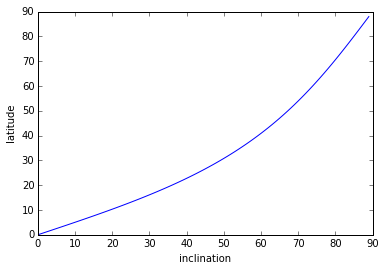

In [3]:
plt.plot(inclination,latitude)
plt.ylabel('latitude')
plt.xlabel('inclination')
plt.show()

## Angle between directions

In [4]:
direction1 = [150,-40]
direction2 = [120,60]

pmag.angle(direction1,direction2)

array([ 103.00072744])

## Generate and plot Fisher distributed unit vectors from a specified distribution

In [5]:
fisher_directions = ipmag.fishrot(k=40, n=50, Dec=200, Inc=30)
directions = pd.DataFrame(fisher_directions,columns=['dec','inc','length'])
directions.head()

,dec,inc,length
0,197.065085,35.150406,1
1,201.996446,36.610444,1
2,198.995049,44.055531,1
3,211.682572,29.502382,1
4,209.638230,40.293932,1


In [6]:
mean = ipmag.fisher_mean(directions.dec,directions.inc)
ipmag.print_direction_mean(mean)

Dec: 198.9  Inc: 30.6
Number of directions in mean (n): 50
Angular radius of 95% confidence (a_95): 3.2
Precision parameter (k) estimate: 40.7


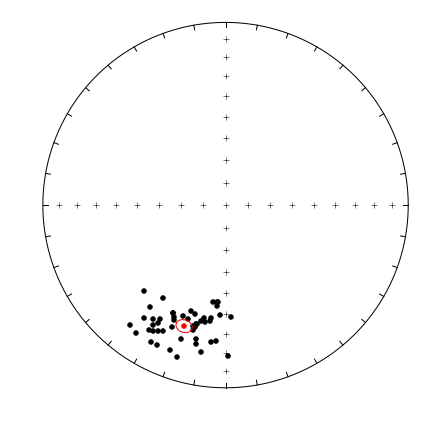

In [7]:
declinations, inclinations = ipmag.fishrot(k=40, n=50, Dec=200, Inc=30, DIBlock=False)

plt.figure(num=1,figsize=(6,6))
ipmag.plot_net(1)
ipmag.plot_di(declinations,inclinations)
ipmag.plot_di_mean(mean['dec'],mean['inc'],mean['alpha95'],color='r')

## Flip polarity of paleomagnetic data

Let's resolve the antipodes of the Fisher-distributed directions we just created using the function flip() function.

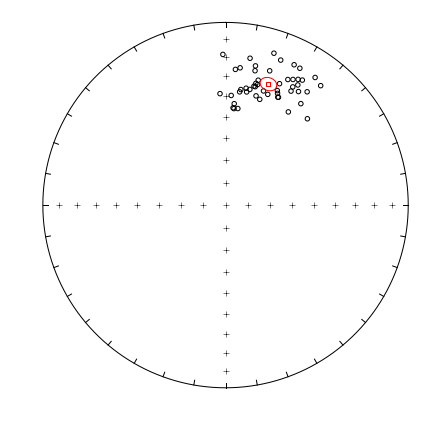

In [8]:
# get reversed directions
reverse = ipmag.flip(ipmag.make_di_block(declinations,inclinations))
rev_directions = pd.DataFrame(reverse,columns=['dec','inc','length'])

# take the Fisher mean of these reversed directions
rev_mean = ipmag.fisher_mean(rev_directions.dec,rev_directions.inc)

# plot the directions in opposite polarity
plt.figure(num=1,figsize=(6,6))
ipmag.plot_net(1)
ipmag.plot_di(rev_directions.dec, rev_directions.inc)
ipmag.plot_di_mean(rev_mean['dec'],rev_mean['inc'],rev_mean['alpha95'],color='r',marker='s')

## Working with anisotropy data

In [9]:
aniso_data = pd.read_csv('./PmagPy_Datafiles/ani_depthplot/rmag_anisotropy.txt',delimiter='\t',skiprows=1)
aniso_data.head()

,anisotropy_n,anisotropy_s1,anisotropy_s2,anisotropy_s3,anisotropy_s4,anisotropy_s5,anisotropy_s6,anisotropy_sigma,anisotropy_tilt_correction,anisotropy_type,anisotropy_unit,er_analyst_mail_names,er_citation_names,er_location_name,er_sample_name,er_site_name,er_specimen_name,magic_method_codes
0,192,0.332294,0.332862,0.334844,-0.000048,0.000027,-0.000263,0.000122,-1,AMS,Normalized by trace,NaN,This study,U1361A,318-U1361A-001H-2-W-35,318-U1361A-001H-2-W-35,318-U1361A-001H-2-W-35,LP-X:AE-H:LP-AN-MS:SO-V
1,192,0.333086,0.332999,0.333916,-0.000262,-0.000322,0.000440,0.000259,-1,AMS,Normalized by trace,NaN,This study,U1361A,318-U1361A-001H-3-W-90,318-U1361A-001H-3-W-90,318-U1361A-001H-3-W-90,LP-X:AE-H:LP-AN-MS:SO-V
2,192,0.333750,0.332208,0.334041,-0.000699,0.000663,0.002888,0.000093,-1,AMS,Normalized by trace,NaN,This study,U1361A,318-U1361A-001H-4-W-50,318-U1361A-001H-4-W-50,318-U1361A-001H-4-W-50,LP-X:AE-H:LP-AN-MS:SO-V
3,192,0.330565,0.333928,0.335507,0.000603,0.000212,-0.000932,0.000198,-1,AMS,Normalized by trace,NaN,This study,U1361A,318-U1361A-001H-5-W-59,318-U1361A-001H-5-W-59,318-U1361A-001H-5-W-59,LP-X:AE-H:LP-AN-MS:SO-V
4,192,0.332747,0.332939,0.334314,-0.001516,-0.000311,-0.000099,0.000162,-1,AMS,Normalized by trace,NaN,This study,U1361A,318-U1361A-001H-6-W-60,318-U1361A-001H-6-W-60,318-U1361A-001H-6-W-60,LP-X:AE-H:LP-AN-MS:SO-V


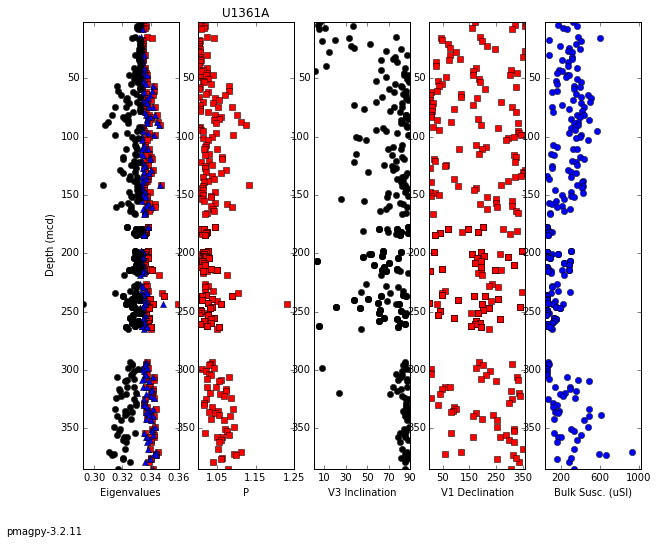

In [14]:
ipmag.aniso_depthplot(dir_path='./PmagPy_Datafiles/ani_depthplot/');